# EDA분석-(6)Hexagonal Binned Plot(육각형 격자 그림)
hexbin plot은 산점도를 히스토그램 형태의 육각형(binning)으로 표현한 그래픽이다. 이는 seaborn과 Matplotlib 같은 시각화 라이브러리에서 제공되며, 주로 두 변수 간의 관계를 효과적으로 시각화하기 위해 사용된다.

### 기존의 산점도와의 다른점(차별점)
기존의 산점도는 데이터 포인트의 밀도가 높아질수록 점이 겹쳐져 가독성이 떨어질 수 있다. hexbin plot은 이러한 문제를 해결하기 위해 데이터를 육각형으로 나누고 각 육각형에 속하는 데이터 포인트의 개수를 색상으로 표현한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 라인
%matplotlib inline
# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 함
import os
os.getcwd() # 현재 디렉토리 파악
os.chdir(r"C:\Users\leeyh\OneDrive\문서\기계학습및설계") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

In [2]:
# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

C:\Users\leeyh\AppData\Local\Temp\ipykernel_18692\1979260110.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/


In [3]:
df=pd.read_csv("winequality-red.csv",encoding='euc-kr') 

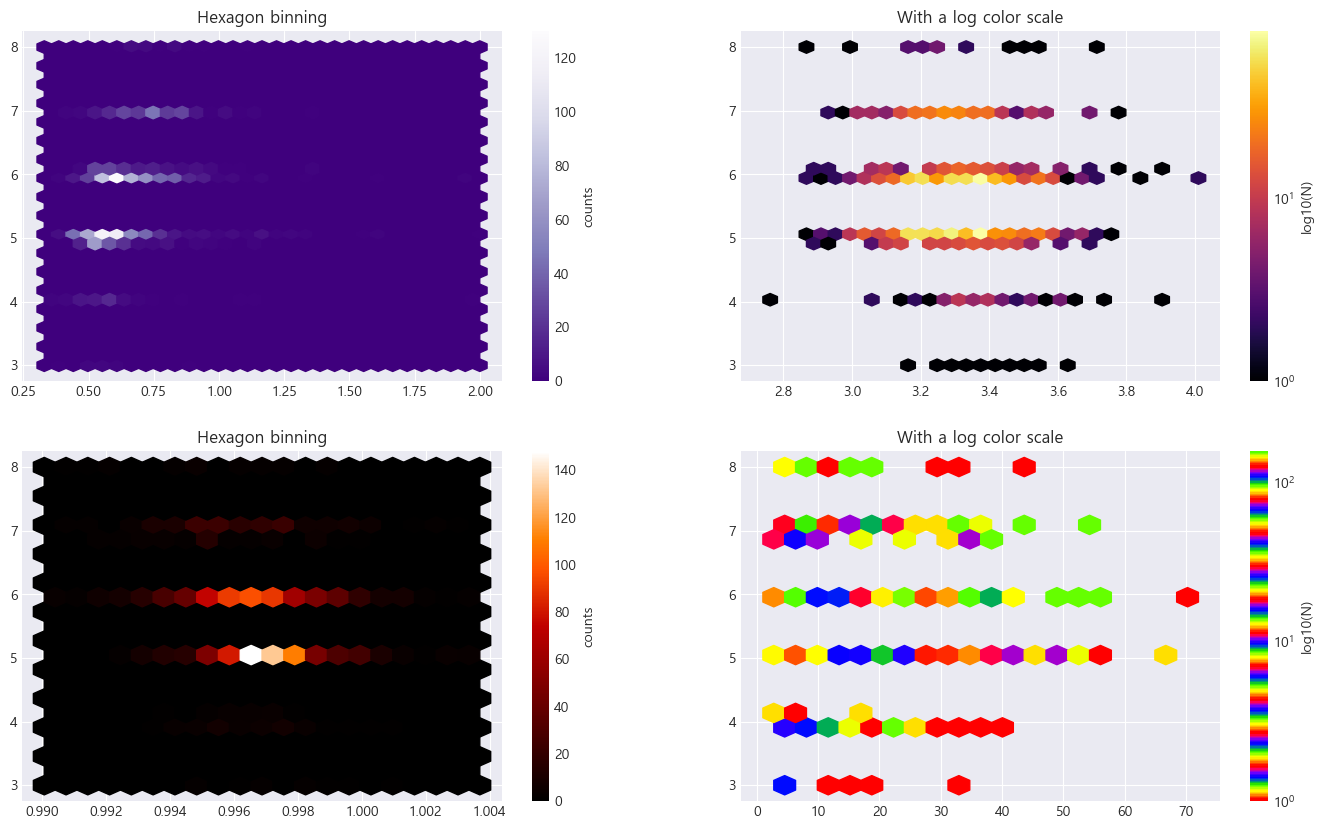

In [4]:


fig, ([ax0, ax1], [ax2, ax3]) = plt.subplots(nrows = 2, ncols = 2, figsize = (17, 10))

hb = ax0.hexbin(df["sulphates"], df["quality"], gridsize = 30, cmap = 'Purples_r')
ax0.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax = ax0, label = 'counts')


hb = ax1.hexbin(df["pH"], df["quality"], gridsize = 30, bins = 'log', cmap = 'inferno')
ax1.set_title("With a log color scale")
cb = fig.colorbar(hb, ax = ax1, label = 'log10(N)')


hb = ax2.hexbin(df["density"], df["quality"], gridsize = 20, cmap = 'gist_heat')
ax2.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax = ax2, label = 'counts')

hb = ax3.hexbin(df["free sulfur dioxide"], df["quality"], gridsize = 20, bins = 'log',
                cmap = 'prism')
ax3.set_title("With a log color scale")
cb = fig.colorbar(hb, ax = ax3, label = 'log10(N)')

plt.show()

#### 우선 위 코드의 출력 그림에서는,
(1) x-황산염, y-품질
(2) x-pH, y-품질
(3) x-밀도, y-품질
(4) x-자유황산염, y-품질

를 나타내고 있다.

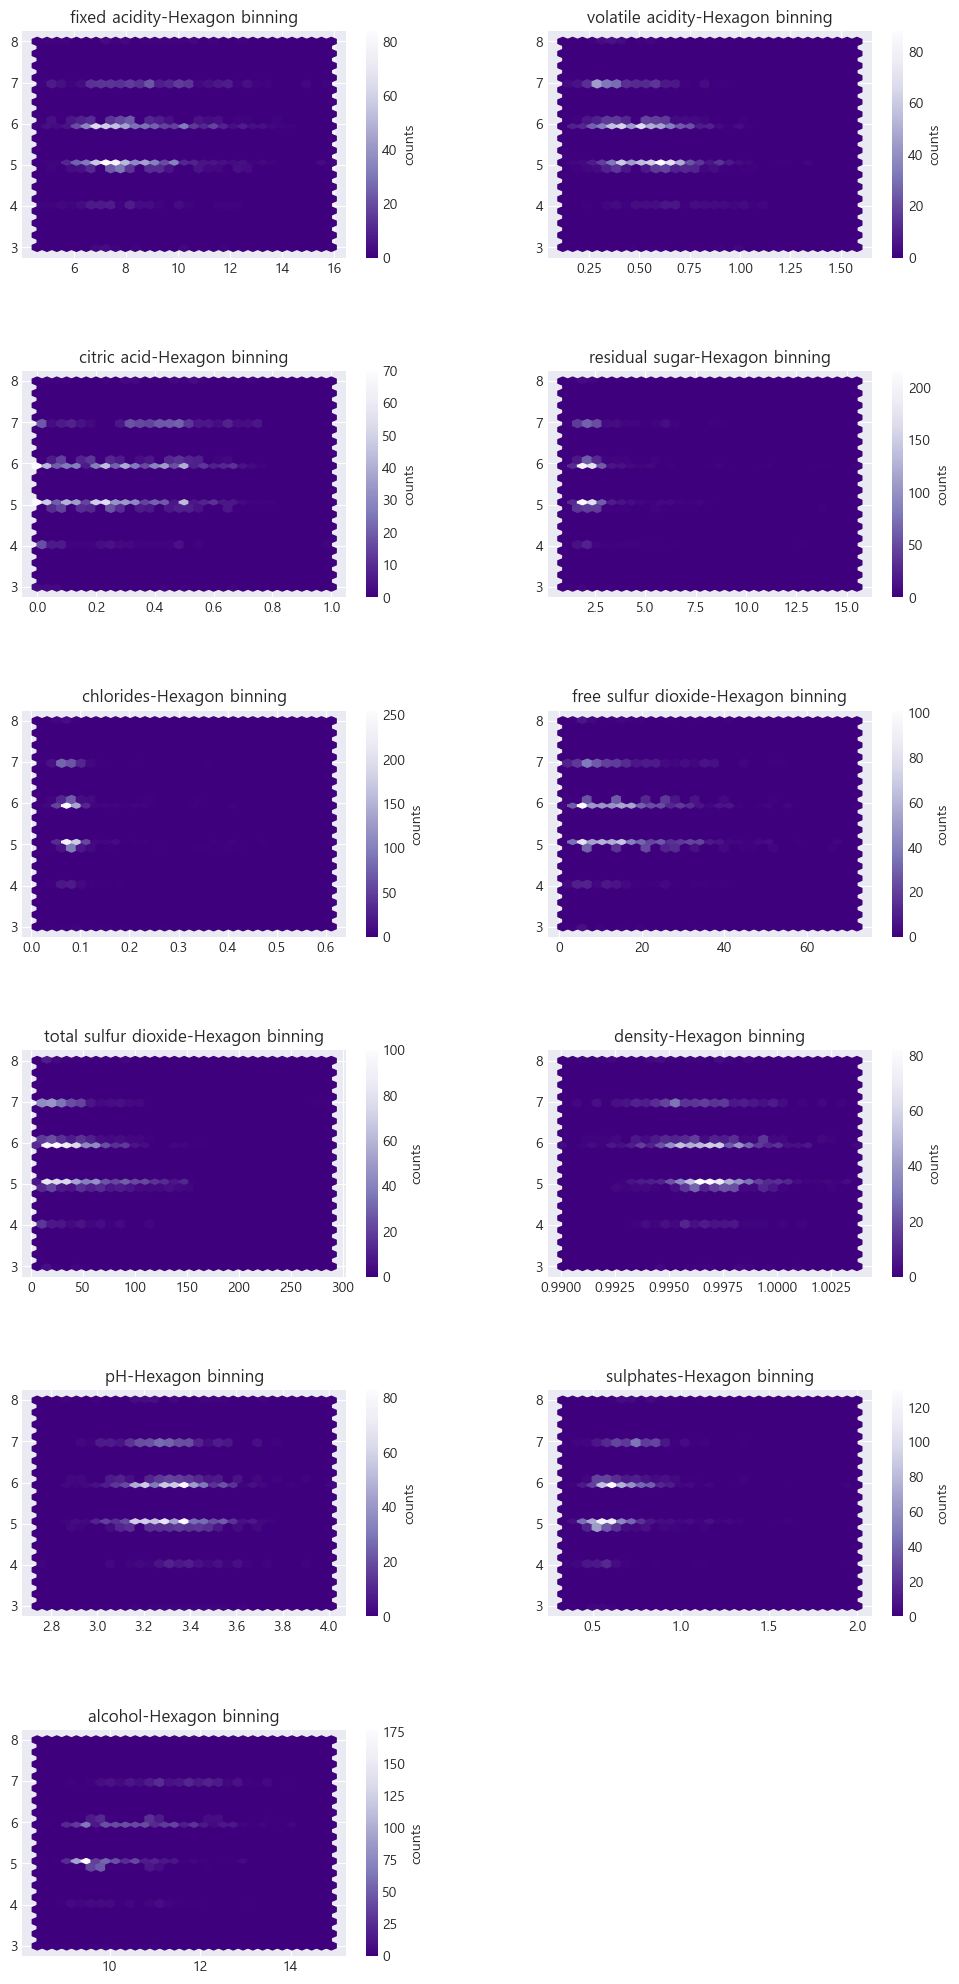

In [5]:
import matplotlib.pyplot as plt

# 독립변수들의 리스트
independent_variables = ["fixed acidity", "volatile acidity", "citric acid",
                         "residual sugar", "chlorides", "free sulfur dioxide",
                         "total sulfur dioxide", "density", "pH", "sulphates",
                         "alcohol"]
quality_variable = "quality"

# 그림의 크기 및 서브플롯 설정
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,25))
axes = axes.flatten()

# 반복문을 통한 서브플롯 생성
for i, ax in enumerate(axes):
    # 11개의 변수까지만 반복
    if i < len(independent_variables):
        hb = ax.hexbin(df[independent_variables[i]], df[quality_variable], gridsize=30, cmap='Purples_r')
        ax.set_title(f"{independent_variables[i]}-Hexagon binning")
        cb = fig.colorbar(hb, ax=ax, label='counts')
    else:
        # 11개 이후의 서브플롯 삭제
        fig.delaxes(ax)
        
# 세로 간격 조절
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.show()

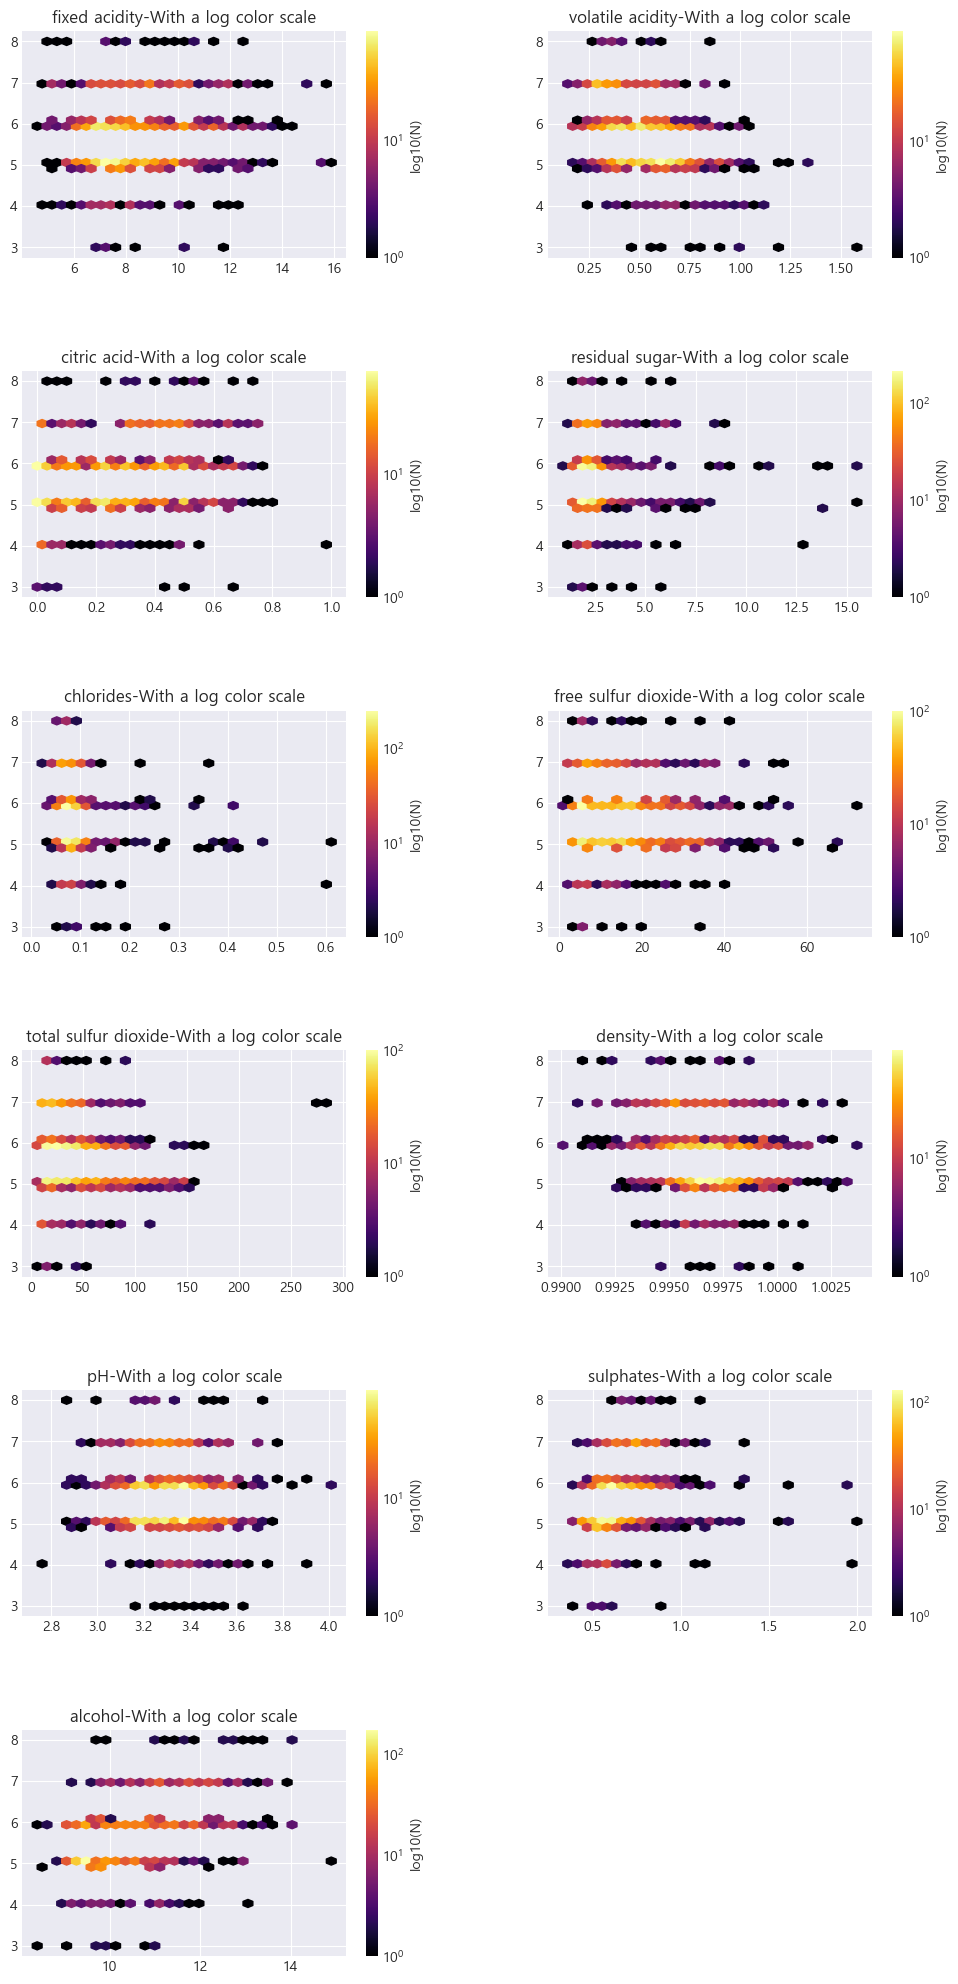

In [10]:
import matplotlib.pyplot as plt

# 독립변수들의 리스트
independent_variables = ["fixed acidity", "volatile acidity", "citric acid",
                         "residual sugar", "chlorides", "free sulfur dioxide",
                         "total sulfur dioxide", "density", "pH", "sulphates",
                         "alcohol"]
quality_variable = "quality"

# 그림의 크기 및 서브플롯 설정
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,25))
axes = axes.flatten()

# 반복문을 통한 서브플롯 생성
for i, ax in enumerate(axes):
    # 11개의 변수까지만 반복
    if i < len(independent_variables):
        hb = ax.hexbin(df[independent_variables[i]], df["quality"], gridsize = 30, bins = 'log', cmap = 'inferno')
        ax.set_title(f"{independent_variables[i]}-With a log color scale")
        cb = fig.colorbar(hb, ax = ax, label = 'log10(N)')

    else:
        # 11개 이후의 서브플롯 삭제
        fig.delaxes(ax)
        
# 세로 간격 조절
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.show()

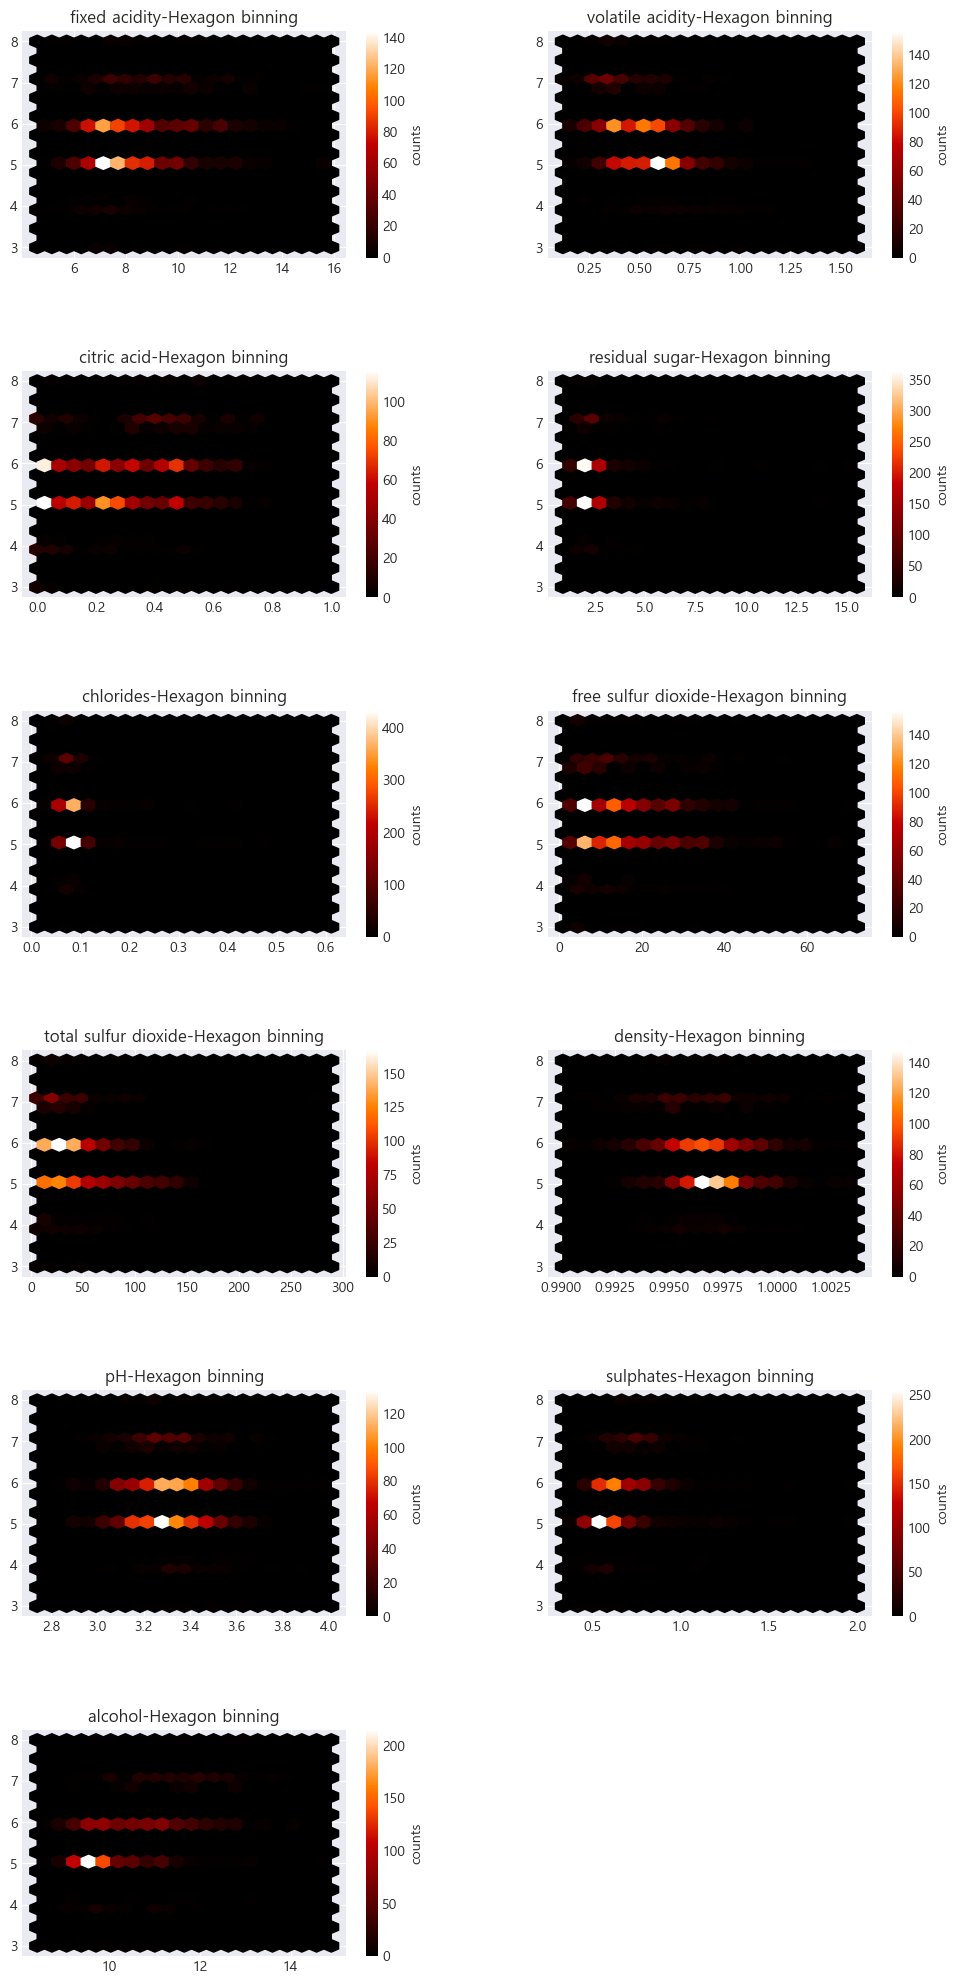

In [11]:
import matplotlib.pyplot as plt

# 독립변수들의 리스트
independent_variables = ["fixed acidity", "volatile acidity", "citric acid",
                         "residual sugar", "chlorides", "free sulfur dioxide",
                         "total sulfur dioxide", "density", "pH", "sulphates",
                         "alcohol"]
quality_variable = "quality"

# 그림의 크기 및 서브플롯 설정
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,25))
axes = axes.flatten()

# 반복문을 통한 서브플롯 생성
for i, ax in enumerate(axes):
    # 11개의 변수까지만 반복
    if i < len(independent_variables):
        hb = ax.hexbin(df[independent_variables[i]], df["quality"], gridsize = 20, cmap = 'gist_heat')
        ax.set_title(f"{independent_variables[i]}-Hexagon binning")
        cb = fig.colorbar(hb, ax = ax, label = 'counts')

    else:
        # 11개 이후의 서브플롯 삭제
        fig.delaxes(ax)
        
# 세로 간격 조절
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.show()

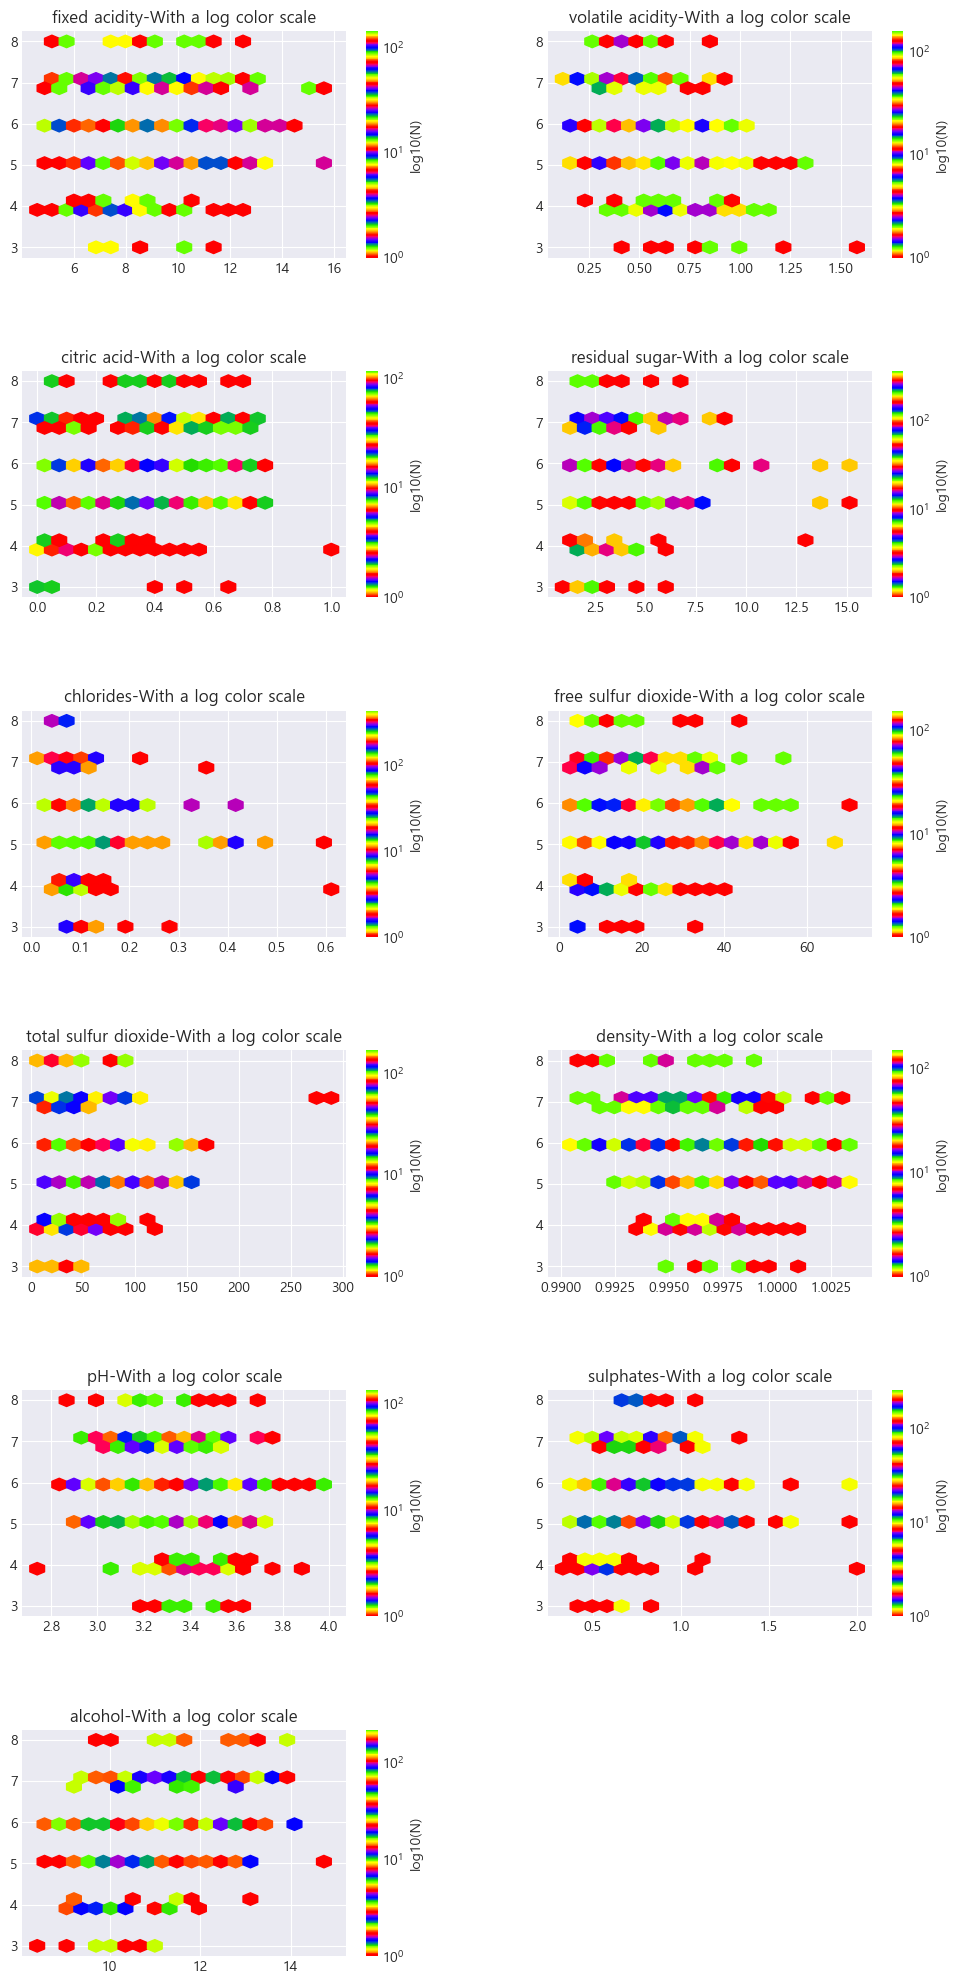

In [12]:
import matplotlib.pyplot as plt

# 독립변수들의 리스트
independent_variables = ["fixed acidity", "volatile acidity", "citric acid",
                         "residual sugar", "chlorides", "free sulfur dioxide",
                         "total sulfur dioxide", "density", "pH", "sulphates",
                         "alcohol"]
quality_variable = "quality"

# 그림의 크기 및 서브플롯 설정
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,25))
axes = axes.flatten()

# 반복문을 통한 서브플롯 생성
for i, ax in enumerate(axes):
    # 11개의 변수까지만 반복
    if i < len(independent_variables):
        hb = ax.hexbin(df[independent_variables[i]], df["quality"], gridsize = 20, bins = 'log',
                cmap = 'prism')
        ax.set_title(f"{independent_variables[i]}-With a log color scale")
        cb = fig.colorbar(hb, ax = ax, label = 'log10(N)')

    else:
        # 11개 이후의 서브플롯 삭제
        fig.delaxes(ax)
        
# 세로 간격 조절
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.show()